# Using multiple LLM agents to query and question SQL - Building a Streamlit app

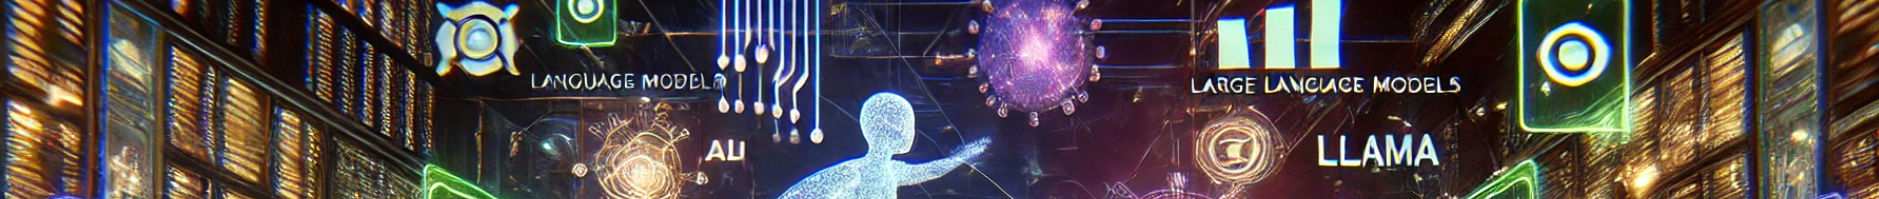

In [2]:
import os
from IPython.display import Image
Image("AI Pic3.png",width=900, height=900)

## Agenda:
- Libraries we need
- Agents Concept Overview
- Solution's Structure
- Testing Groq API
- Creating our agents
- Creating Streamlit app
- Deployng the app

### Libraries we need

In [5]:
# pip install groq

In [6]:
# pip install streamlit 

In [7]:
# pip install pypyodbc

# 0. Agents Concept

In the context of large language models (LLMs), agents refer to distinct roles or personas that simulate different characters or behaviors during a conversation or task. These agents can act as individuals with their own goals, perspectives, and knowledge, enabling multi-agent interactions where they can argue, collaborate, or exchange ideas on a given topic.

- Key Concepts of Agents in LLMs:
    1.	Role Assignment:
    o	Each agent is assigned a specific role or identity, such as a job title (e.g., Data Analyst, Data Scientist), personality traits (e.g., aggressive debater, calm explainer), or viewpoints. This allows the LLM to generate responses that align with the behavior or perspective of that role.
    2.	Distinct Goals and Behaviors:
    o	Agents often have differing objectives or perspectives. For example, in a debate, one agent might argue that the job of a Data Scientist is better, while the other argues for the Data Analyst role. These conflicting goals drive the conversation, with the LLM generating arguments in favor of each role.
    3.	Simulated Dialogue:
    o	Agents interact with each other in a back-and-forth dialogue. The LLM generates responses for each agent based on prompts designed to reflect their distinct stances. The conversation flows as each agent builds on the previous statements, responding to and challenging the points raised by the other agent.
    4.	Controlled Context:
    o	The model's system messages or prompts can be used to control the context and behavior of each agent. For example:
    	Agent 1 (Data Analyst): "You are a Data Analyst defending your profession. Explain why your job is the best."
    	Agent 2 (Data Scientist): "You are a Data Scientist, and you're arguing why your profession is superior to a Data Analyst." This ensures that the LLM stays in character for each agent throughout the conversation.
    5.	Multi-Agent Collaboration or Conflict:
    o	Agents can be designed to collaborate on a task (e.g., brainstorming solutions to a problem) or engage in conflict, such as debating or challenging each other. This versatility allows for simulating a range of interactions, from cooperative discussions to competitive debates.
    6.	Use Cases of Agents in LLMs:
    o	Debates: As in your original request, agents can be set up to debate various topics from different perspectives.
    o	Expert Systems: Each agent can represent a different expert in a field, providing advice from their domain of expertise.
    o	Simulated Characters: Agents can act as fictional or historical characters in conversations, role-playing to answer questions or provide unique perspectives.

These agents are instructed via prompts to focus on their specific roles, leading to a structured argument where each agent stays "in character." This interaction simulates a real-world debate, where each side makes and counters arguments based on their assigned identity.

- Practical Applications of Agents:
    1. Chatbots: Multi-agent setups can simulate customer support bots where different agents provide solutions for different types of queries (technical, financial, etc.).
    2. Creative Writing: Authors may use agents to simulate characters interacting with each other in a narrative.
    3. Training and Education: In educational scenarios, agents can simulate different viewpoints or roles to help students learn through dialogue and debate.
    4. AI for Collaboration: Agents representing various departments (e.g., marketing, engineering, sales) can simulate internal company discussions to generate business insights.
    5. By designing agents with clear roles and behaviors, LLMs can offer dynamic, multi-perspective conversations that are useful for generating ideas, solving problems, or even exploring different sides of an argument.

#### Agents Frameworks

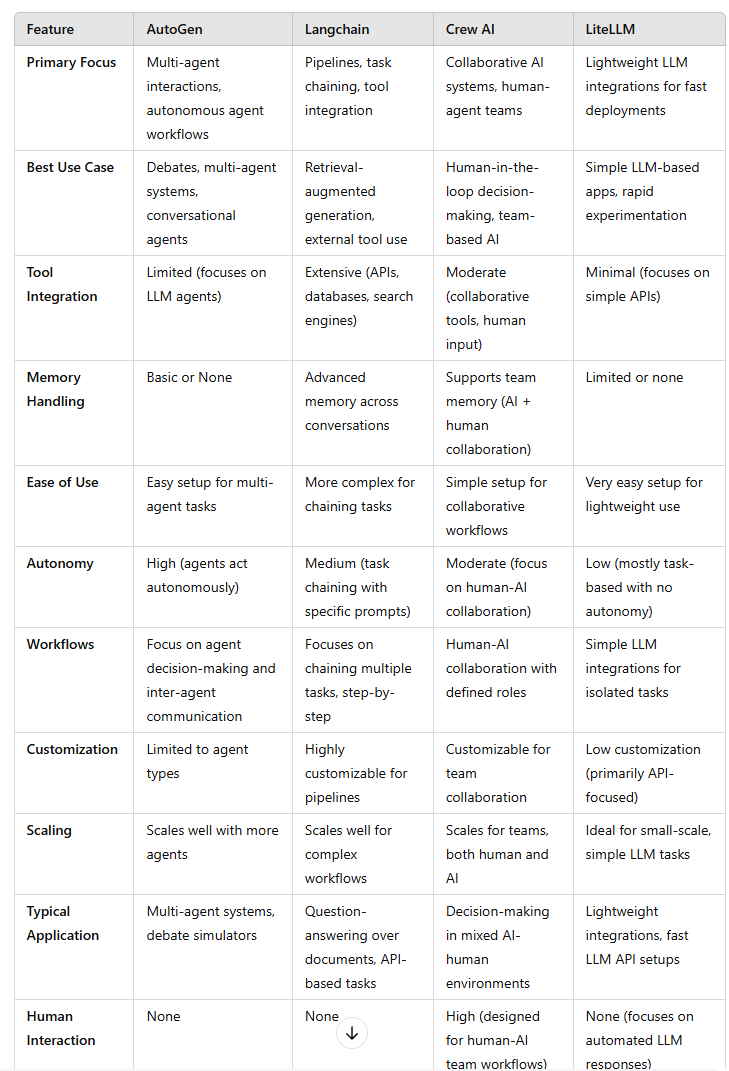

In [12]:
Image("Agents_frameworks.png",width=900, height=900)

# 1. Structure of our Solution

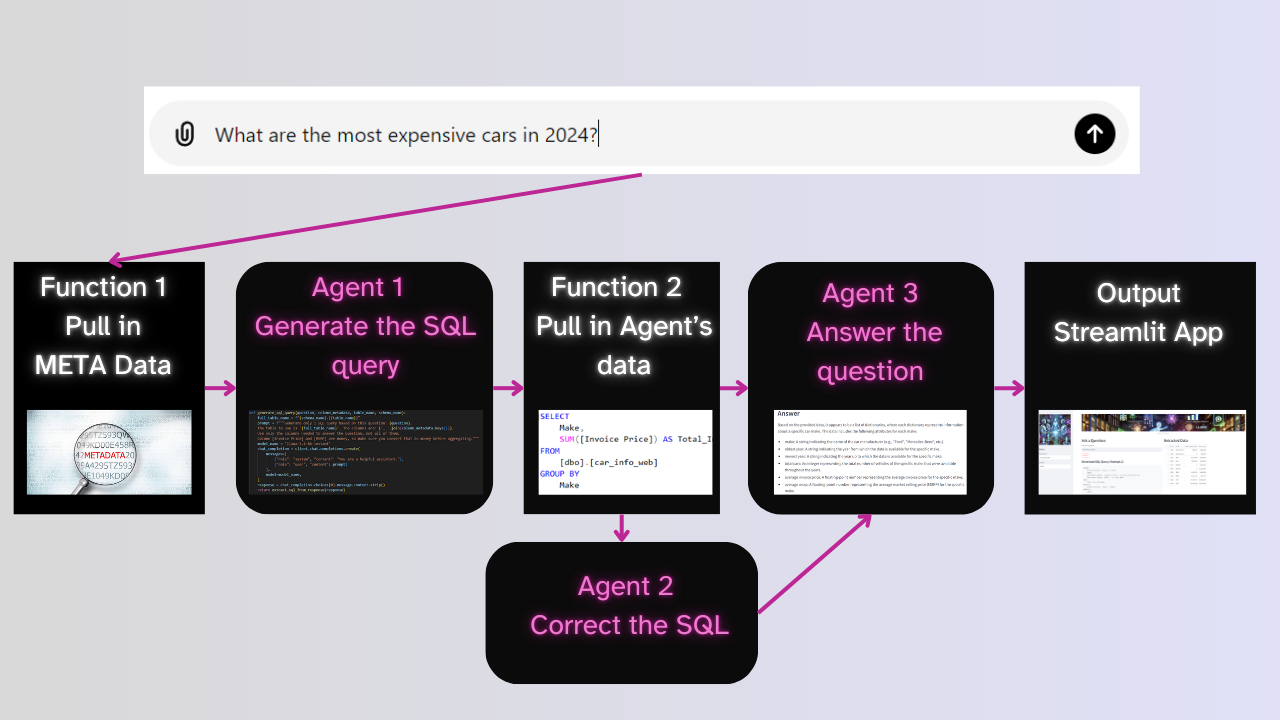

In [14]:
Image("SQL Groq Diagram.png",width=900, height=900)

# 2. Loading the SQL data

In [38]:
#################################################################################################################
##############################   Getting the file from SQL Server      ##########################################
#################################################################################################################

import pypyodbc as podbc
import os
import pandas as pd

conn2 = podbc.connect("Driver={ODBC Driver 17 for SQL Server};"
                     "Server=DESKTOP-8L98FK0;"
                     "Database=Car_information;"
                     "Trusted_Connection=yes;")

# running the SQL query i need
SQL_Query = pd.read_sql_query('''SELECT * FROM [dbo].[car_info_web]''', conn2)

#conn.close()

# Viz
SQL_Query.head()

C:\Users\pitsi\AppData\Local\Temp\ipykernel_1176\3959837888.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  SQL_Query = pd.read_sql_query('''SELECT * FROM [dbo].[car_info_web]''', conn2)


,index,make,model,year,trim,msrp,invoice price,used/new price,body size,body style,cylinders,engine aspiration,drivetrain,transmission,horsepower,torque,highway fuel economy
0,0,Aston Martin,DBX707,2024,Base,"$242,000",,"$242,000",Large,SUV,V8,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm,20 mpg
1,1,Audi,A3,2024,Premium w/40 TFSI,"$35,800","$33,653","$35,800",Compact,Sedan,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg
2,2,Audi,A3,2024,Premium w/40 TFSI,"$37,800","$35,533","$37,800",Compact,Sedan,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,"$41,400","$38,917","$41,400",Compact,Sedan,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,"$39,400","$37,037","$39,400",Compact,Sedan,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg


# 3. Testing the API

In [40]:
# Testing if the API Works
import os
from groq import Groq

# Initialize the Groq client
# client = Groq(api_key='')

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": "you are a helpful assistant."
        },
        {
            "role": "user",
            "content": "Explain the importance of large language models",
        }
    ],
    model="llama-3.1-8b-instant",
)

print(chat_completion.choices[0].message.content)

## Create a new Key: https://console.groq.com/keys
## Available models: https://console.groq.com/docs/models

Fast language models are a crucial innovation in the field of natural language processing (NLP) that have gained significant attention in recent years. These models are designed to process and generate large amounts of language data quickly, which have several important implications:

1. **Real-time Data Analysis**: Fast language models can analyze vast amounts of data in real-time, enabling applications to respond promptly to user queries or inputs. This feature is essential for applications like chatbots, virtual assistants, and language translation systems.

2. **Improved User Experiences**: Fast language models can generate responses in a matter of milliseconds, providing users with a seamless and interactive experience. This is particularly important in applications like customer service chatbots or virtual assistants, where speed and accuracy are essential.

3. **Increased Compute Efficiency**: Fast language models are often optimized for efficient computational operations, using

# 4. Creating the agents

### 4.1. Extracting metadata

In [44]:
import pypyodbc
from groq import Groq  # Import Groq client (make sure to install the Groq package if needed)
import re  # To help extract the SQL query from the generated text
import pandas as pd  # Import pandas to work with DataFrame

# Initialize the Groq client
# client = Groq(api_key='')  # Replace with your actual API key

# Example SQL query that the model should follow (modify this based on your database)
example_sql_query = """
SELECT * FROM [dbo].[car_info_web];
"""

# SQL Database Connection setup
connection = pypyodbc.connect("Driver={ODBC Driver 17 for SQL Server};"
                     "Server=DESKTOP-8L98FK0;"
                     "Database=Car_information;"
                     "Trusted_Connection=yes;")
cursor = connection.cursor()

# Hard-coded table name
TABLE_NAME = "car_info_web"  # Replace with your actual table name
SCHEMA_NAME = "[dbo]"  # Database schema name

# Agent 0: Extracts column names and metadata for the specified table (with square brackets)
def extract_table_metadata():
    # Query to get column names and data types for the specified table
    metadata_query = f"SELECT COLUMN_NAME, DATA_TYPE FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = '{TABLE_NAME}'"
    cursor.execute(metadata_query)
    columns = cursor.fetchall()
    
    # Wrap all column names in square brackets
    column_metadata = {f"[{col[0]}]": col[1] for col in columns}
    
    print(f"Extracted metadata for table '{TABLE_NAME}': {column_metadata}")
    
    # Creating an example SQL query to guide the model (based on the extracted columns)
    example_sql_query = f"SELECT {', '.join(column_metadata.keys())} FROM {TABLE_NAME} WHERE [CONDITION] LIMIT 10;"
    
    return column_metadata, example_sql_query

In [46]:
TABLE_NAME = "car_info_web"  # Replace with your actual table name
SCHEMA_NAME = "[dbo]"  # Database schema name

extract_table_metadata()

Extracted metadata for table 'car_info_web': {'[index]': 'bigint', '[Make]': 'varchar', '[Model]': 'varchar', '[Year]': 'varchar', '[Trim]': 'varchar', '[MSRP]': 'varchar', '[Invoice Price]': 'varchar', '[Used/New Price]': 'varchar', '[Body Size]': 'varchar', '[Body Style]': 'varchar', '[Cylinders]': 'varchar', '[Engine Aspiration]': 'varchar', '[Drivetrain]': 'varchar', '[Transmission]': 'varchar', '[Horsepower]': 'varchar', '[Torque]': 'varchar', '[Highway Fuel Economy]': 'varchar'}


({'[index]': 'bigint',
  '[Make]': 'varchar',
  '[Model]': 'varchar',
  '[Year]': 'varchar',
  '[Trim]': 'varchar',
  '[MSRP]': 'varchar',
  '[Invoice Price]': 'varchar',
  '[Used/New Price]': 'varchar',
  '[Body Size]': 'varchar',
  '[Body Style]': 'varchar',
  '[Cylinders]': 'varchar',
  '[Engine Aspiration]': 'varchar',
  '[Drivetrain]': 'varchar',
  '[Transmission]': 'varchar',
  '[Horsepower]': 'varchar',
  '[Torque]': 'varchar',
  '[Highway Fuel Economy]': 'varchar'},
 'SELECT [index], [Make], [Model], [Year], [Trim], [MSRP], [Invoice Price], [Used/New Price], [Body Size], [Body Style], [Cylinders], [Engine Aspiration], [Drivetrain], [Transmission], [Horsepower], [Torque], [Highway Fuel Economy] FROM car_info_web WHERE [CONDITION] LIMIT 10;')

### 4.2. Extract only the SQL Query from response

In [24]:
# Function to extract SQL query from response
def extract_sql_from_response(response):
    queries = re.findall(r"SELECT.*?;", response, re.IGNORECASE | re.DOTALL)
    if queries:
        return queries[0].strip().rstrip(';')
    else:
        raise ValueError("No valid SQL query found.")

### 4.3. Generating SQL Query

In [48]:
# Function to generate SQL query
def generate_sql_query(question, column_metadata, table_name, schema_name):
    full_table_name = f"{schema_name}.[{table_name}]"
    prompt = f"""Generate only 1 SQL query based on this question: {question}.
    The table to use is '{full_table_name}'. The columns are: {', '.join(column_metadata.keys())}.
    Use only the columns needed to answer the question, not all of them.
    Limit the data as much as possible and follows T-SQL syntax.
    Make sure to use the correct column names as provided with square brackets.
    Column [Invoice Price] and [MSRP] are money, so make sure you convert that to money before aggregating."""
    model_name = 'llama-3.1-8b-instant'
    chat_completion = client.chat.completions.create(
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        model=model_name,
    )
    print(chat_completion.choices[0].message.content.strip()) ## this is only to showcase full response before the extract_sql_from_response function
    response = chat_completion.choices[0].message.content.strip()
    return extract_sql_from_response(response)

In [50]:
table_name = "car_info_web"  # Replace with your actual table name
schema_name = "[dbo]"  # Database schema name
column_metadata, example_sql_query = extract_table_metadata()
question = "What are the top 10 fastest horsepower cars in our data and their details?"

Extracted metadata for table 'car_info_web': {'[index]': 'bigint', '[Make]': 'varchar', '[Model]': 'varchar', '[Year]': 'varchar', '[Trim]': 'varchar', '[MSRP]': 'varchar', '[Invoice Price]': 'varchar', '[Used/New Price]': 'varchar', '[Body Size]': 'varchar', '[Body Style]': 'varchar', '[Cylinders]': 'varchar', '[Engine Aspiration]': 'varchar', '[Drivetrain]': 'varchar', '[Transmission]': 'varchar', '[Horsepower]': 'varchar', '[Torque]': 'varchar', '[Highway Fuel Economy]': 'varchar'}


In [52]:
generate_sql_query(question, column_metadata, table_name, schema_name)

Here is the SQL query to get the top 10 fastest horsepower cars and their details from the '[dbo].[car_info_web]' table:

```sql
SELECT TOP 10 
       [Make],
       [Model],
       [Year],
       [Horsepower]
FROM 
       [dbo].[car_info_web]
ORDER BY 
       [Horsepower] DESC;
```

This query will return the top 10 cars with the highest horsepower values. The `TOP 10` clause ensures the result is limited to 10 rows and the `ORDER BY` clause ensures the result is in descending order by horsepower.


'SELECT TOP 10 \n       [Make],\n       [Model],\n       [Year],\n       [Horsepower]\nFROM \n       [dbo].[car_info_web]\nORDER BY \n       [Horsepower] DESC;'

## 4.4. Fetching the data from SQL 

In [30]:
def fetch_answer_from_db(sql_query):
    cursor.execute(sql_query)
    # Fetch the column names
    columns = [column[0] for column in cursor.description]
    # Fetch all rows
    result = cursor.fetchall()
    # Convert the result to a pandas DataFrame
    df = pd.DataFrame(result, columns=columns)
    return df

In [54]:
sql_query = generate_sql_query(question, column_metadata, table_name, schema_name)

fetch_answer_from_db(sql_query)

```sql
SELECT TOP 10 
    [Make], 
    [Model],
    [Horsepower],
    [Invoice Price],
    [MSRP],
    CONVERT(money, [Invoice Price]) * 100 AS Invoice_scaled,
    CONVERT(money, [MSRP]) * 100 AS MSRP_scaled
FROM [dbo].[car_info_web]
ORDER BY [Horsepower] DESC;
```
This SQL query will return the top 10 fastest horsepower cars in the data, along with their Make, Model, horsepower, invoice price, MSRP, and both prices scaled by a factor of 100. The cars are ordered by horsepower in descending order, so the ones with the most horsepower are shown first.


,make,model,horsepower,invoice price,msrp,invoice_scaled,msrp_scaled
0,Mercedes-Benz,AMG GT,831 hp @ 5500 rpm,,"$194,900",0.0000,19490000.0000
1,Mercedes-Benz,S-Class,791 hp @ 0 rpm,,"$182,250",0.0000,18225000.0000
2,BMW,XM,738 hp @ 0 rpm,"$172,550","$185,000",17255000.0000,18500000.0000
3,Ford,F-150,700 hp @ 6650 rpm,"$99,609","$107,350",9960900.0000,10735000.0000
4,Aston Martin,DBX707,697 hp @ 6000 rpm,,"$242,000",0.0000,24200000.0000
5,Aston Martin,DBX707,697 hp @ 6000 rpm,,"$236,000",0.0000,23600000.0000
6,Aston Martin,Vantage,690 hp @ 6500 rpm,,"$298,200",0.0000,29820000.0000
7,Aston Martin,Vantage,690 hp @ 6500 rpm,,"$348,700",0.0000,34870000.0000
8,Mercedes-Benz,C-Class,671 hp @ 6750 rpm,,"$83,900",0.0000,8390000.0000
9,Bentley,Continental,650 hp @ 5000 rpm,,"$355,600",0.0000,35560000.0000


### 4.6. Agent 2 - Answering the question

In [56]:
# Agent 3: Answer the initial question based on the DataFrame
def answer_question_from_df(question, df):
    # Prepare the DataFrame content as JSON-like structure
    df_json = df.to_json(orient='records')
    
    # Define the prompt for the LLM
    prompt = f"""Based on the following data, answer this question: {question}.
Here is the data:
{df_json}
Please provide a concise and accurate response."""
    
    model_name = 'llama-3.1-8b-instant'
    chat_completion = client.chat.completions.create(
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        model=model_name,
    )

    # Return the generated response from the LLM
    response = chat_completion.choices[0].message.content.strip()
    return response

In [58]:
df = fetch_answer_from_db(sql_query)
question = "What are the top 10 fastest horsepower cars in our data and their details?"
answer_question_from_df(question, df)

'Based on the provided data, I can extract the top 10 fastest horsepower cars with their details. Here are the results:\n\n1. **Mercedes-Benz AMG GT**: 831 hp @ 5500 rpm, invoice price: $, msrp: $194,900\n2. **Mercedes-Benz S-Class**: 791 hp @ 0 rpm, invoice price: $, msrp: $182,250\n3. **BMW XM**: 738 hp @ 0 rpm, invoice price: $172,550, msrp: $185,000\n4. **Ford F-150**: 700 hp @ 6650 rpm, invoice price: $99,609, msrp: $107,350\n5. **Aston Martin DBX707**: 697 hp @ 6000 rpm, invoice price: $, msrp: $236,000\n6. **Aston Martin DBX707**: 697 hp @ 6000 rpm, invoice price: $, msrp: $242,000\n7. **Aston Martin Vantage**: 690 hp @ 6500 rpm, invoice price: $, msrp: $348,700\n8. **Aston Martin Vantage**: 690 hp @ 6500 rpm, invoice price: $, msrp: $298,200\n9. **Mercedes-Benz C-Class**: 671 hp @ 6750 rpm, invoice price: $, msrp: $83,900\n10. **Bentley Continental**: 650 hp @ 5000 rpm, invoice price: $, msrp: $355,600\n\nNote: The `invoice price: $` values are empty in the original data, so th

### 4.6. Running it all together

In [62]:
import pypyodbc
from groq import Groq  # Import Groq client (make sure to install the Groq package if needed)
import re  # To help extract the SQL query from the generated text
import pandas as pd  # Import pandas to work with DataFrame

# Initialize the Groq client
# client = Groq(api_key='')  # Replace with your actual API key

# Example SQL query that the model should follow (modify this based on your database)
example_sql_query = """
SELECT * FROM [dbo].[car_info_web];
"""

# SQL Database Connection setup
connection = pypyodbc.connect("Driver={ODBC Driver 17 for SQL Server};"
                     "Server=DESKTOP-8L98FK0;"
                     "Database=Car_information;"
                     "Trusted_Connection=yes;")
cursor = connection.cursor()

# Hard-coded table name
TABLE_NAME = "car_info_web"  # Replace with your actual table name
SCHEMA_NAME = "[dbo]"  # Database schema name

# Agent 0: Extracts column names and metadata for the specified table (with square brackets)
def extract_table_metadata():
    # Query to get column names and data types for the specified table
    metadata_query = f"SELECT COLUMN_NAME, DATA_TYPE FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = '{TABLE_NAME}'"
    cursor.execute(metadata_query)
    columns = cursor.fetchall()
    
    # Wrap all column names in square brackets
    column_metadata = {f"[{col[0]}]": col[1] for col in columns}
    
    print(f"Extracted metadata for table '{TABLE_NAME}': {column_metadata}")
    
    # Creating an example SQL query to guide the model (based on the extracted columns)
    example_sql_query = f"SELECT {', '.join(column_metadata.keys())} FROM {TABLE_NAME} WHERE [CONDITION] LIMIT 10;"
    
    return column_metadata, example_sql_query

# Function to extract only the first valid SQL query from the generated text
def extract_sql_from_response(response):
    # Use regex to find all SQL queries starting with "SELECT"
    queries = re.findall(r"SELECT.*?;", response, re.IGNORECASE | re.DOTALL)
    
    if queries:
        # Return the first valid SQL query
        return queries[0].strip()
    else:
        raise ValueError("Could not find a valid SQL query in the response")

# Agent 1: Generates an optimized SQL query using Llama 3.1 via Groq API with T-SQL syntax and schema
def generate_sql_query(question, column_metadata, example_sql_query):
    # Use the schema and table name when referring to the table (e.g., [dbo].[car_info_web])
    full_table_name = f"{SCHEMA_NAME}.[{TABLE_NAME}]"
    
    prompt = f"""Generate an SQL query based on this question: {question}.
The SQL should use T-SQL syntax for SQL Server and should be compatible with SQL Server Management Studio (SSMS).
The table to use is '{full_table_name}'. 
The columns available in the table are: {', '.join(column_metadata.keys())}.
Make sure to use the correct column names as provided (with square brackets where needed).
Use the following example SQL query as a guide:

Example SQL Query:
{example_sql_query}

Make sure the query uses appropriate table names, limits the data as much as possible, and follows T-SQL syntax."""
    
    model_name = 'llama-3.1-8b-instant'
    chat_completion = client.chat.completions.create(
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        model=model_name,
    )

    # Extract the SQL query from the completion response
    response = chat_completion.choices[0].message.content.strip()
    sql_query = extract_sql_from_response(response)
    return sql_query

# Agent 2: Runs the query and returns the result as a DataFrame
def fetch_answer_from_db(sql_query):
    cursor.execute(sql_query)
    # Fetch the column names
    columns = [column[0] for column in cursor.description]
    # Fetch all rows
    result = cursor.fetchall()
    # Convert the result to a pandas DataFrame
    df = pd.DataFrame(result, columns=columns)
    return df

# Agent 3: Answer the initial question based on the DataFrame
def answer_question_from_df(question, df):
    # Prepare the DataFrame content as JSON-like structure
    df_json = df.to_json(orient='records')
    
    # Define the prompt for the LLM
    prompt = f"""Based on the following data, answer this question: {question}.
Here is the data:
{df_json}
Please provide a concise and accurate response."""
    
    model_name = 'llama-3.1-8b-instant'
    chat_completion = client.chat.completions.create(
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        model=model_name,
    )

    # Return the generated response from the LLM
    response = chat_completion.choices[0].message.content.strip()
    return response

# Main function to handle the process
def handle_question(question):
    # Agent 0: Extract table metadata
    column_metadata, example_sql_query = extract_table_metadata()

    # Agent 1: Generate SQL Query using extracted metadata and T-SQL syntax with schema
    sql_query = generate_sql_query(question, column_metadata, example_sql_query)
    print(f"Generated SQL Query: {sql_query}")

    # Agent 2: Fetch the data and return it as a DataFrame
    df = fetch_answer_from_db(sql_query)
    print("Fetched Data in DataFrame:")
    print(df)

    # Agent 3: Answer the question based on the DataFrame
    answer = answer_question_from_df(question, df)
    print(f"Answer to the question: {answer}")

# Example question
question = "What are the top 10 fastest horsepower cars in our data and their details?"
handle_question(question)

# Close the connection
connection.close()

Extracted metadata for table 'car_info_web': {'[index]': 'bigint', '[Make]': 'varchar', '[Model]': 'varchar', '[Year]': 'varchar', '[Trim]': 'varchar', '[MSRP]': 'varchar', '[Invoice Price]': 'varchar', '[Used/New Price]': 'varchar', '[Body Size]': 'varchar', '[Body Style]': 'varchar', '[Cylinders]': 'varchar', '[Engine Aspiration]': 'varchar', '[Drivetrain]': 'varchar', '[Transmission]': 'varchar', '[Horsepower]': 'varchar', '[Torque]': 'varchar', '[Highway Fuel Economy]': 'varchar'}
Generated SQL Query: SELECT TOP 10 
       [index],
       [Make],
       [Model],
       [Year],
       [Trim],
       [MSRP],
       [Invoice Price],
       [Used/New Price],
       [Body Size],
       [Body Style],
       [Cylinders],
       [Engine Aspiration],
       [Drivetrain],
       [Transmission],
       [Horsepower],
       [Torque],
       [Highway Fuel Economy]
FROM 
       [dbo].[car_info_web]
ORDER BY 
       [Horsepower] DESC;
Fetched Data in DataFrame:
   index           make        mode

# 5. Building the Streamlit app

In [ ]:
import streamlit as st
import pandas as pd
import pypyodbc
from groq import Groq
import re
from PIL import Image
import time

# Initialize the Groq client
client = Groq(api_key='')  # Replace with your actual API key

# Set Streamlit layout to wide and customize page background color
st.set_page_config(layout="wide")

# SQL Database Connection setup
def connect_db():
    return pypyodbc.connect("Driver={ODBC Driver 17 for SQL Server};"
                            "Server=DESKTOP-8L98FK0;"
                            "Database=Car_information;"
                            "Trusted_Connection=yes;")

# Display banner image at the top of the app with reduced height
image2 = Image.open('AI Pic1.png')
st.sidebar.image(image2, use_column_width=True)

st.sidebar.header('Filters')

# Table name input
table_name = st.sidebar.text_input('Table Name', 'car_info_web')

# Schema input
schema_name = st.sidebar.text_input('Schema', '[dbo]')

# Sidebar Pic
image = Image.open('AI Pic3.png')
st.image(image, use_column_width=True, caption="Sales and AI Banner", output_format="PNG")

# Set up two columns
left_col, right_col = st.columns(2)

# Function to extract metadata from the specified table
def extract_table_metadata(table_name, schema_name):
    connection = connect_db()
    cursor = connection.cursor()
    metadata_query = f"SELECT COLUMN_NAME, DATA_TYPE FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = '{table_name}'"
    cursor.execute(metadata_query)
    columns = cursor.fetchall()
    column_metadata = {f"[{col[0]}]": col[1] for col in columns}
    connection.close()
    return column_metadata

# Function to generate SQL query
def generate_sql_query(question, column_metadata, table_name, schema_name):
    full_table_name = f"{schema_name}.[{table_name}]"
    prompt = f"""Generate only 1 SQL query based on this question: {question}.
    The table to use is '{full_table_name}'. The columns are: {', '.join(column_metadata.keys())}.
    Use only the columns needed to answer the question, not all of them.
    Column [Invoice Price] and [MSRP] are money, so make sure you convert that to money before aggregating."""
    model_name = 'llama-3.1-8b-instant'
    chat_completion = client.chat.completions.create(
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        model=model_name,
    )
    response = chat_completion.choices[0].message.content.strip()
    return extract_sql_from_response(response)

# Function to extract SQL query from response
def extract_sql_from_response(response):
    queries = re.findall(r"SELECT.*?;", response, re.IGNORECASE | re.DOTALL)
    if queries:
        return queries[0].strip().rstrip(';')
    else:
        raise ValueError("No valid SQL query found.")

# Function to fetch data from SQL
def fetch_answer_from_db(sql_query):
    connection = connect_db()
    cursor = connection.cursor()
    cursor.execute(sql_query)
    columns = [column[0] for column in cursor.description]
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=columns)
    connection.close()
    return df

# Function to answer the question based on the DataFrame
def answer_question_from_df(question, df):
    df_json = df.to_json(orient='records')
    prompt = f"Based on the following data, answer this question: {question}. Here is the data: {df_json}"
    model_name = 'llama-3.1-8b-instant'
    chat_completion = client.chat.completions.create(
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        model=model_name,
    )
    return chat_completion.choices[0].message.content.strip()

# Function to run the complete process (with retries)
def run_with_retries(question, retries=3):
    success = False
    attempt = 0
    result_df = None
    answer = None

    while attempt < retries and not success:
        try:
            attempt += 1
            column_metadata = extract_table_metadata(table_name, schema_name)
            sql_query = generate_sql_query(question, column_metadata, table_name, schema_name)
            
            # Display the generated SQL query
            st.subheader(f"Generated SQL Query (Attempt {attempt})")
            st.code(sql_query)  # Display SQL query in a code block

            result_df = fetch_answer_from_db(sql_query)
            answer = answer_question_from_df(question, result_df)
            
            success = True  # Mark as success if no errors occur
        except Exception as e:
            st.warning(f"Attempt {attempt} failed with error: {e}")
            time.sleep(1)  # Wait before retrying
    
    if success:
        return result_df, answer
    else:
        st.error("Failed to process the request after 3 attempts.")
        return None, None

# Main logic in the left column (Question input and Answer)
with left_col:
    st.header("Ask a Question")
    question = st.text_input("Enter your question", "What are the top 10 fastest horsepower cars in our data and their details?")
    
    if st.button('Submit'):
        df, answer = run_with_retries(question)
        
        if df is not None and answer is not None:
            st.subheader("Answer")
            st.write(answer)

# Right column to display the DataFrame
with right_col:
    st.header("Extracted Data")
    if 'df' in locals() and df is not None:
        st.dataframe(df)


# Streamlit run multile_llms.py

In [ ]:
possible questtions:
-
